this session of the code we split the data set into training and test set and normalize the 
training set  also make some analysis on the data set and 

Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


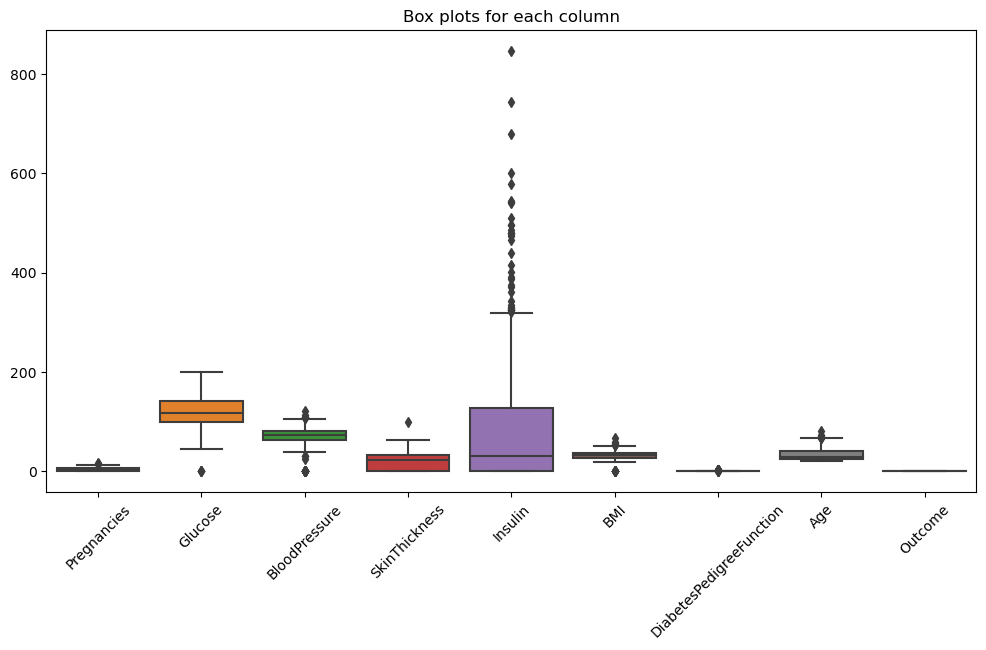

Outliers in Pregnancies: with lower bound of  -6.5 and upper bound 13.5
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
88            15      136             70             32      110  37.1   
159           17      163             72             41      114  40.9   
298           14      100             78             25      184  36.6   
455           14      175             62             30        0  33.6   

     DiabetesPedigreeFunction  Age  Outcome  
88                      0.153   43        1  
159                     0.817   47        1  
298                     0.412   46        1  
455                     0.212   38        1  


Outliers in Glucose: with lower bound of  37.125 and upper bound 202.125
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75             1        0             48             20        0  24.7   
182            1        0             74             20       23  27.7   
342            1        0     

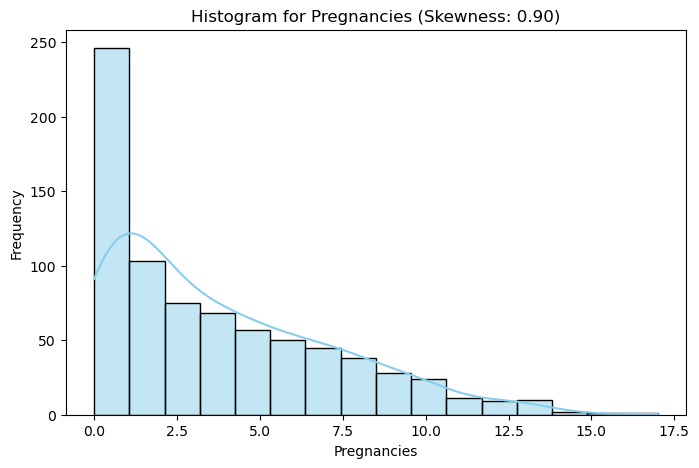

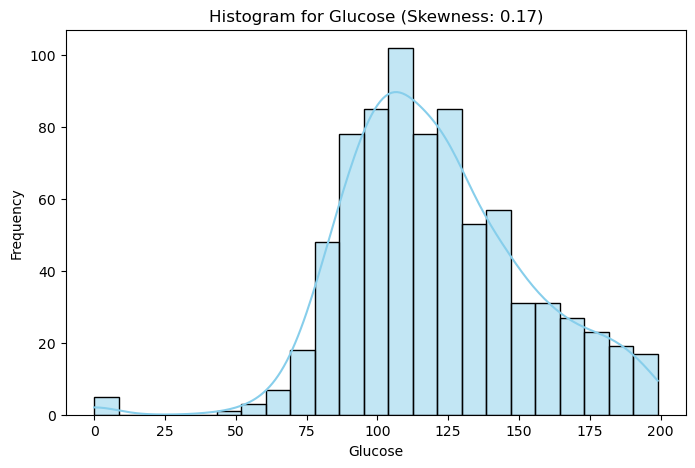

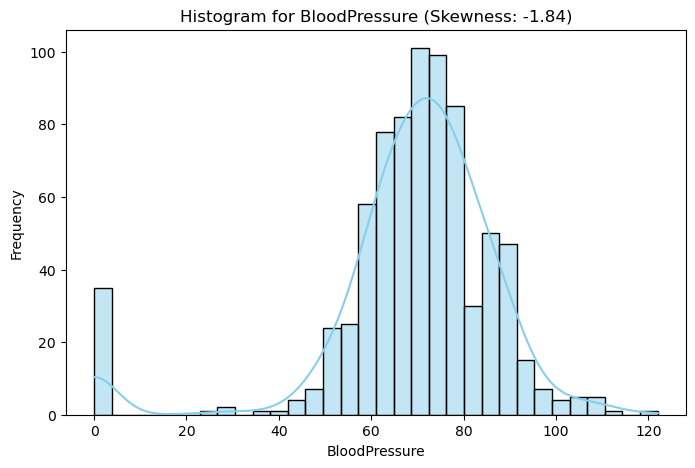

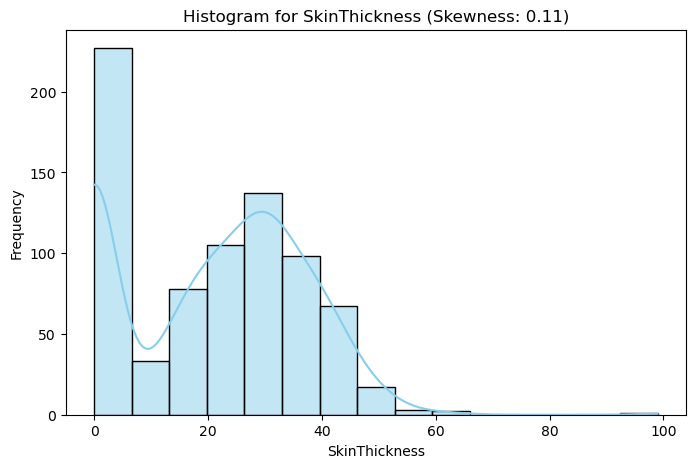

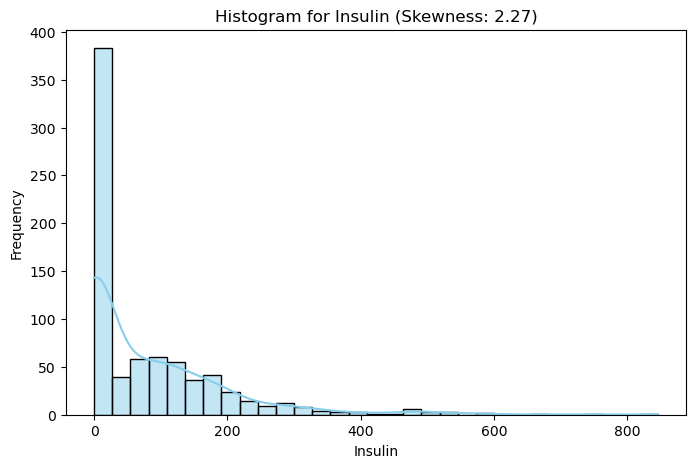

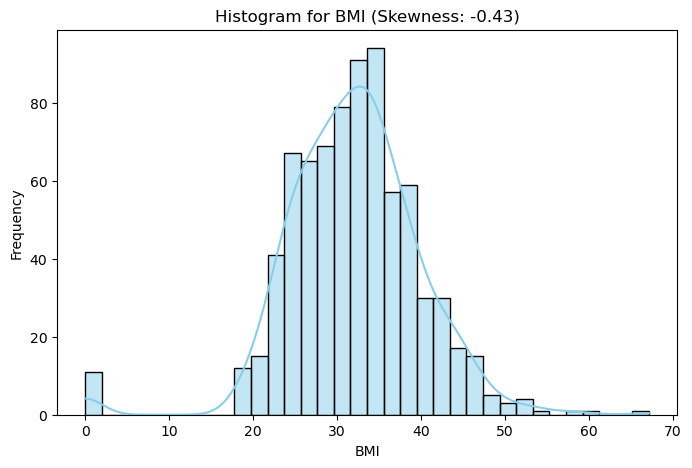

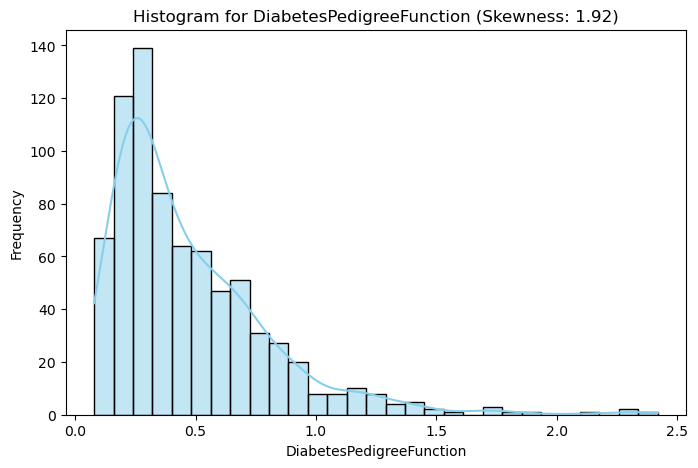

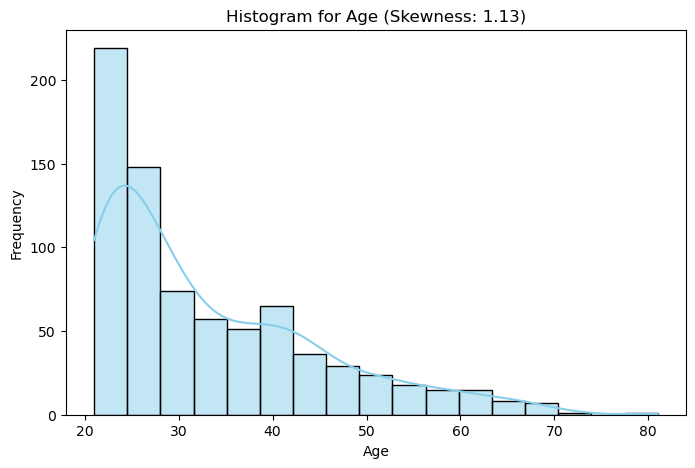

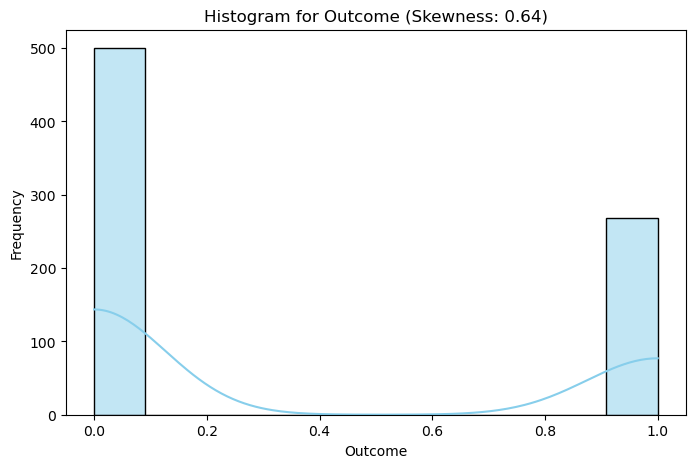

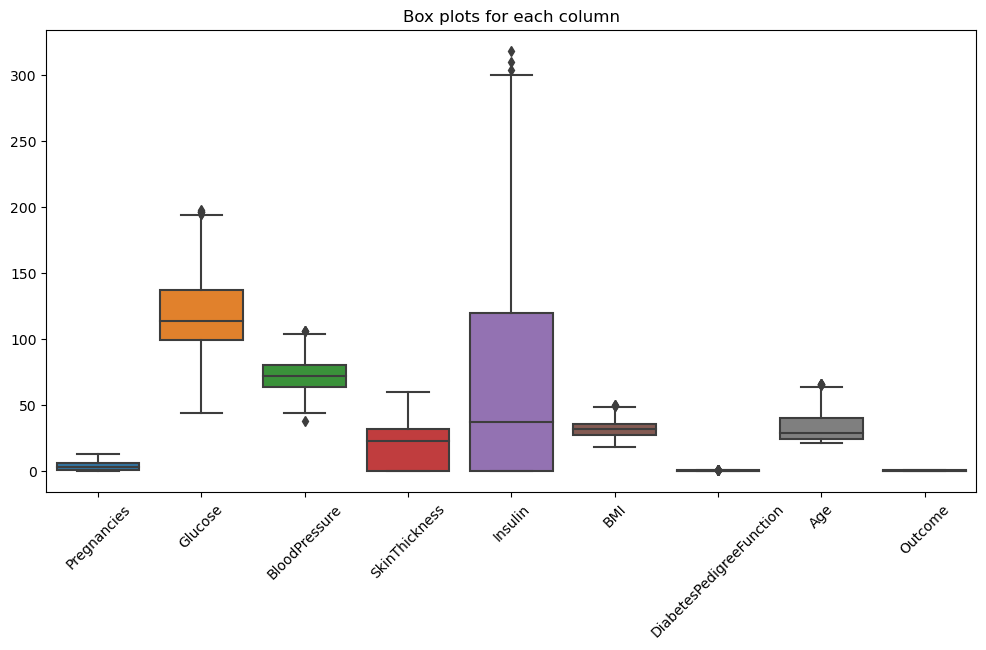

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.461538  0.675325       0.500000       0.583333  0.000000  0.484277   
1       0.076923  0.266234       0.411765       0.483333  0.000000  0.264151   
2       0.615385  0.902597       0.382353       0.000000  0.000000  0.160377   
3       0.076923  0.292208       0.411765       0.383333  0.295597  0.311321   
5       0.384615  0.467532       0.529412       0.000000  0.000000  0.232704   
..           ...       ...            ...            ...       ...       ...   
763     0.769231  0.370130       0.558824       0.800000  0.566038  0.462264   
764     0.153846  0.506494       0.470588       0.450000  0.000000  0.584906   
765     0.384615  0.500000       0.500000       0.383333  0.352201  0.251572   
766     0.076923  0.532468       0.323529       0.000000  0.000000  0.374214   
767     0.076923  0.318182       0.470588       0.516667  0.000000  0.383648   

     DiabetesPedigreeFunction       Age

In [1]:
%run '/home/justice/Desktop/Machine Learning Project/project_demonstration_based_on_paper/part1_ feature_selection.ipynb'
import import_ipynb
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

%store -r data_set_selected

splitting the data set based on  60% training data , 20 % validation and 20% test

In [2]:
print(data_set_selected)
train_data = data_set_selected.iloc[0 : (data_set_selected.shape[0]*6)//10]
validation_data = data_set_selected.iloc[((data_set_selected.shape[0]*6)//10)+1 : (data_set_selected.shape[0]*8)//10 ]
test_data = data_set_selected.iloc[((data_set_selected.shape[0]*8)//10) + 1 : data_set_selected.shape[0]]
print(train_data)
print(validation_data)
print(test_data)

     Pregnancies  Glucose   BMI  DiabetesPedigreeFunction  Age  Outcome
0              6      148  33.6                     0.627   50        1
1              1       85  26.6                     0.351   31        0
2              8      183  23.3                     0.672   32        1
3              1       89  28.1                     0.167   21        0
4              0      137  43.1                     2.288   33        1
..           ...      ...   ...                       ...  ...      ...
763           10      101  32.9                     0.171   63        0
764            2      122  36.8                     0.340   27        0
765            5      121  26.2                     0.245   30        0
766            1      126  30.1                     0.349   47        1
767            1       93  30.4                     0.315   23        0

[768 rows x 6 columns]
     Pregnancies  Glucose   BMI  DiabetesPedigreeFunction  Age  Outcome
0              6      148  33.6         

Try to change the the data set and remove outliers and 

In [3]:
Q1 = train_data.quantile(0.25)
Q3 = train_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((train_data < (Q1 - 1.5 * IQR)) | (train_data > (Q3 + 1.5 * IQR)))
clean_data_train_data = train_data[~outliers].dropna()
# z_scores = stats.zscore(train_data)
# outliers = (z_scores > 3) | (z_scores < -3)
# clean_data_train_data = train_data[~outliers].dropna()

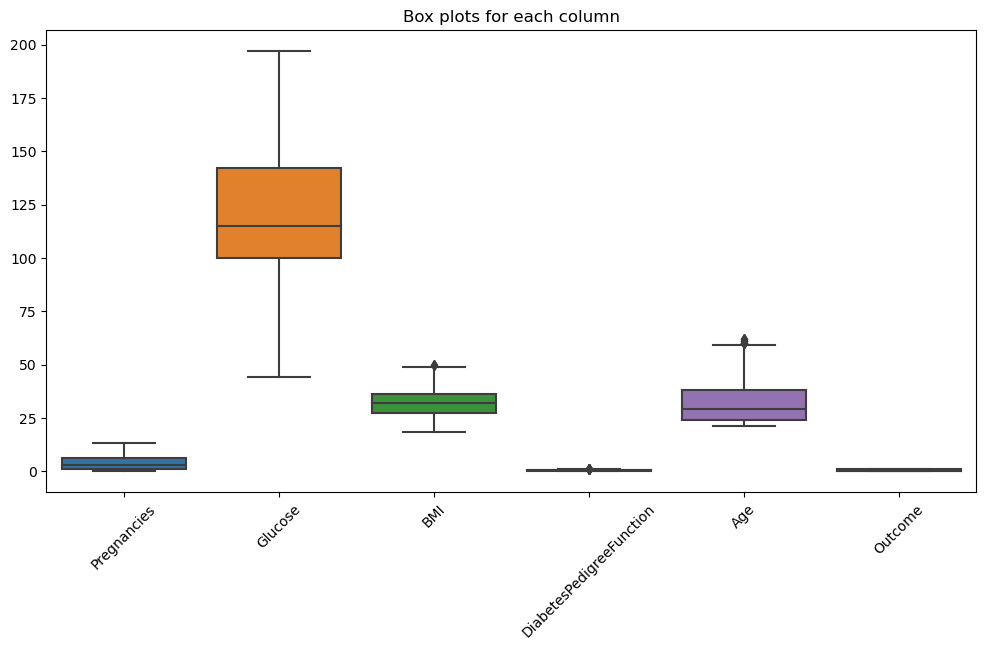

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=clean_data_train_data)
plt.title('Box plots for each column')
plt.xticks(rotation=45)
plt.show()

Normalizing the train_data and makeing analysis on it 

In [5]:
numerical_columns = clean_data_train_data.select_dtypes(include=['float64', 'int64']).columns

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected columns using .loc
clean_data_train_data.loc[:, numerical_columns] = scaler.fit_transform(clean_data_train_data.loc[:, numerical_columns])
print(clean_data_train_data)

     Pregnancies   Glucose       BMI  DiabetesPedigreeFunction       Age  \
0       0.461538  0.679739  0.484277                  0.479058  0.707317   
1       0.076923  0.267974  0.264151                  0.238220  0.243902   
2       0.615385  0.908497  0.160377                  0.518325  0.268293   
3       0.076923  0.294118  0.311321                  0.077661  0.000000   
5       0.384615  0.470588  0.232704                  0.107330  0.219512   
..           ...       ...       ...                       ...       ...   
452     0.000000  0.307190  0.682390                  0.264398  0.097561   
454     0.153846  0.366013  0.616352                  0.366492  0.073171   
456     0.076923  0.594771  0.267296                  0.531414  1.000000   
457     0.384615  0.274510  0.377358                  0.249564  0.073171   
458     0.769231  0.679739  0.610063                  0.805410  0.731707   

     Outcome  
0          1  
1          0  
2          1  
3          0  
5          0

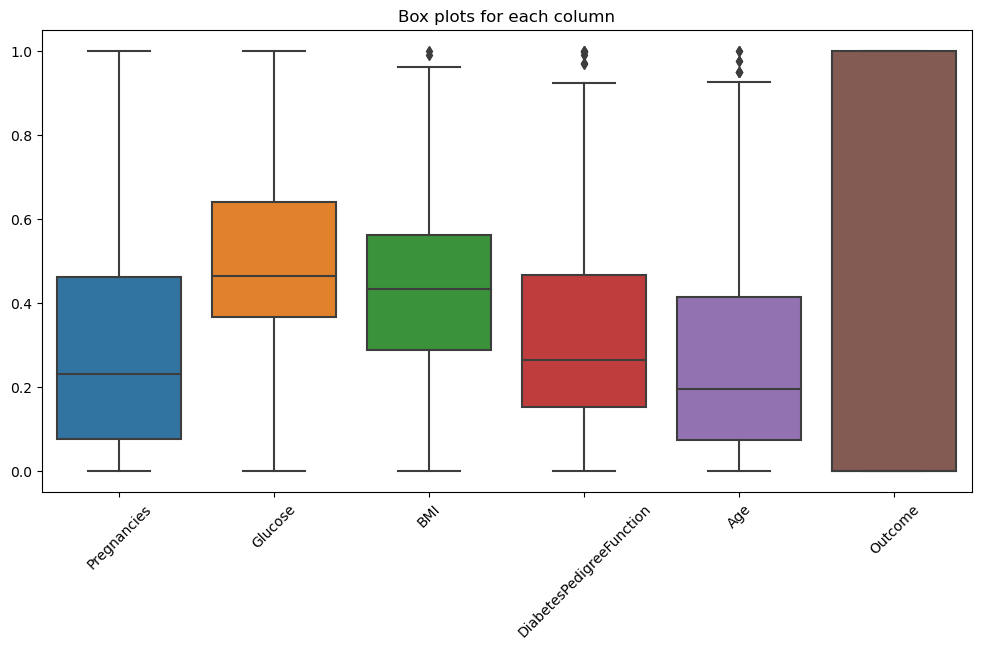

details of Pregnancies 
max = 1.0 and min = 0.0
details of Glucose 
max = 1.0 and min = 0.0
details of BMI 
max = 1.0 and min = 0.0
details of DiabetesPedigreeFunction 
max = 1.0 and min = 0.0
details of Age 
max = 1.0 and min = 0.0
details of Outcome 
max = 1 and min = 0


In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=clean_data_train_data)
plt.title('Box plots for each column')
plt.xticks(rotation=45)
plt.show()

for column in clean_data_train_data.columns:
    max_value = clean_data_train_data[column].max()
    min_value = clean_data_train_data[column].min()
    print (f"details of {column} ")
    print(f"max = {max_value} and min = {min_value}")

Mean of each column:
Pregnancies                 0.291861
Glucose                     0.506670
BMI                         0.440069
DiabetesPedigreeFunction    0.323819
Age                         0.271127
Outcome                     0.370460
dtype: float64

Standard Deviation of each column:
Pregnancies                 0.246230
Glucose                     0.199866
BMI                         0.208089
DiabetesPedigreeFunction    0.226480
Age                         0.249655
Outcome                     0.483514
dtype: float64

 variance of each column:
Pregnancies                 0.060629
Glucose                     0.039947
BMI                         0.043301
DiabetesPedigreeFunction    0.051293
Age                         0.062328
Outcome                     0.233785
dtype: float64

 skewness of each column:
Pregnancies                 0.835622
Glucose                     0.542947
BMI                         0.255288
DiabetesPedigreeFunction    0.921802
Age                         1.

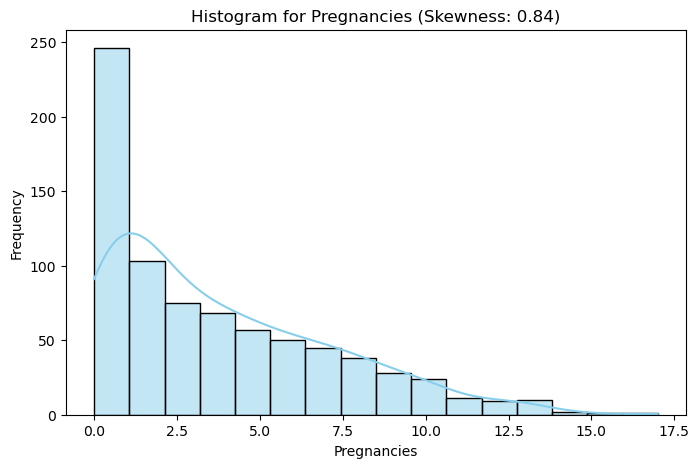

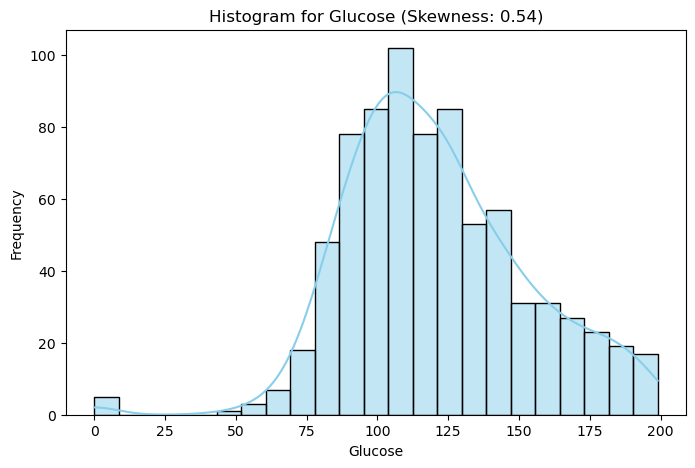

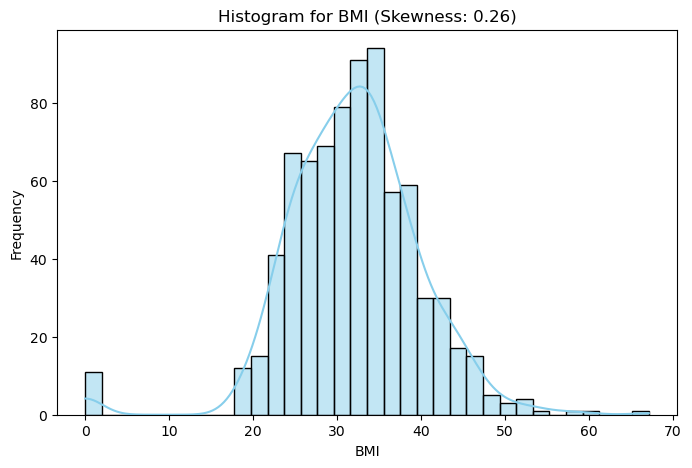

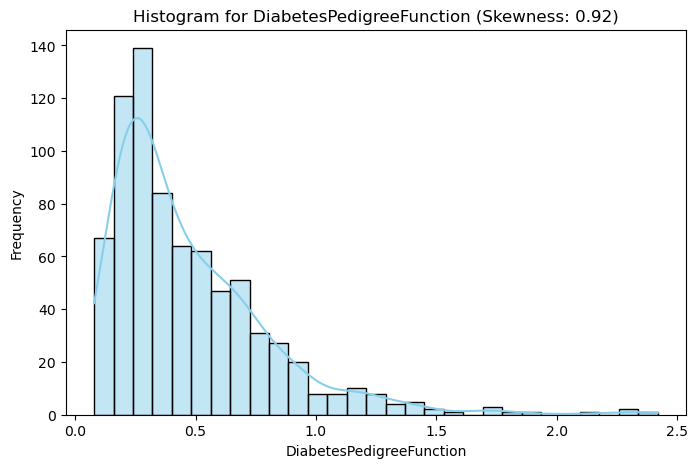

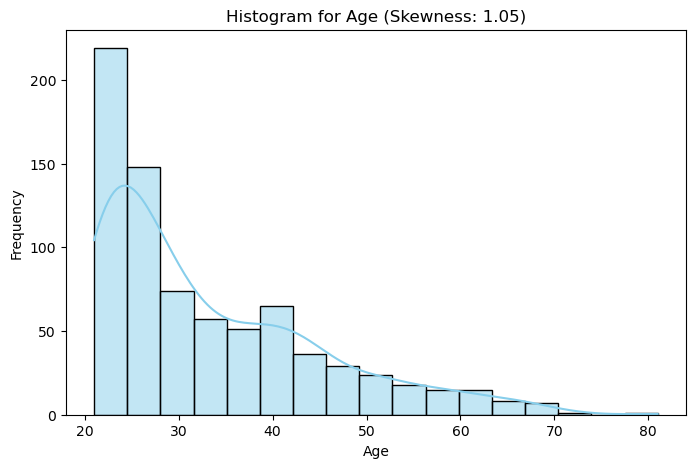

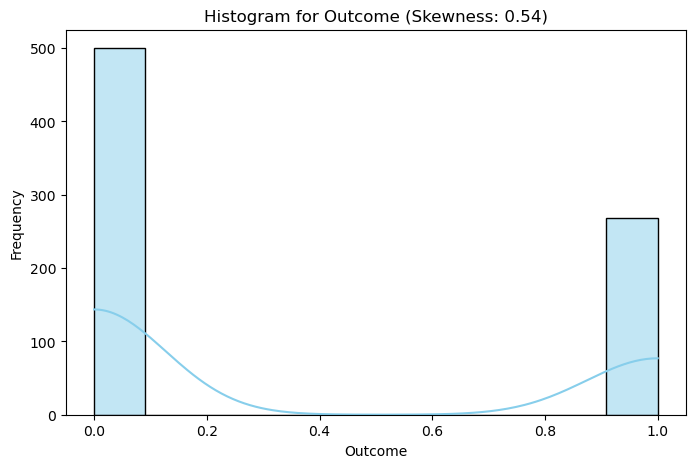

In [7]:
# Calculate mean and standard deviation for each column
means = clean_data_train_data.mean()
std_devs = clean_data_train_data.std()
variance = clean_data_train_data.var()
skewness = clean_data_train_data.skew()

# Display the results
print("Mean of each column:")
print(means)

print("\nStandard Deviation of each column:")
print(std_devs)

print("\n variance of each column:")
print(variance)

print("\n skewness of each column:")
print(skewness)

for column in clean_data_train_data.columns:
    if data_set[column].dtype != 'object':  # Plot only numerical columns
        plt.figure(figsize=(8, 5))
        sns.histplot(data_set[column], kde=True, color='skyblue')
        plt.title(f'Histogram for {column} (Skewness: {skewness[column]:.2f})')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

data_set for training  for the next version

In [8]:
normalized_training_set = clean_data_train_data
print(normalized_training_set)
print(validation_data)
print(test_data)

     Pregnancies   Glucose       BMI  DiabetesPedigreeFunction       Age  \
0       0.461538  0.679739  0.484277                  0.479058  0.707317   
1       0.076923  0.267974  0.264151                  0.238220  0.243902   
2       0.615385  0.908497  0.160377                  0.518325  0.268293   
3       0.076923  0.294118  0.311321                  0.077661  0.000000   
5       0.384615  0.470588  0.232704                  0.107330  0.219512   
..           ...       ...       ...                       ...       ...   
452     0.000000  0.307190  0.682390                  0.264398  0.097561   
454     0.153846  0.366013  0.616352                  0.366492  0.073171   
456     0.076923  0.594771  0.267296                  0.531414  1.000000   
457     0.384615  0.274510  0.377358                  0.249564  0.073171   
458     0.769231  0.679739  0.610063                  0.805410  0.731707   

     Outcome  
0          1  
1          0  
2          1  
3          0  
5          0

In [9]:
%store normalized_training_set
%store validation_data
%store test_data

Stored 'normalized_training_set' (DataFrame)
Stored 'validation_data' (DataFrame)
Stored 'test_data' (DataFrame)
